<a href="https://colab.research.google.com/github/arsalanmontazeri/Arsalan-Montazeri/blob/main/Classic_Rock_Tracks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For displaying all of the columns in dataframes
pd.set_option('display.max_column',None)
# For data modeling
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
# For saving models
import pickle

In [ ]:
df=pd.read_csv('UltimateClassicRock.csv')

In [ ]:
df.head()

,Track,Artist,Album,Year,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
0,Play A Simple Song,38 Special,38 Special,1977,3:13,4,0.521,0.367,0,-13.866,1,0.0278,0.6920,0.000003,0.1080,0.789,83.412,16
1,Four Wheels,38 Special,38 Special,1977,4:43,4,0.535,0.710,2,-12.287,1,0.0428,0.0100,0.023000,0.0495,0.445,160.361,10
2,Fly Away,38 Special,38 Special,1977,5:13,4,0.563,0.563,2,-10.781,1,0.0263,0.0357,0.001850,0.1400,0.564,106.739,13
3,Tell Everybody,38 Special,38 Special,1977,4:09,4,0.638,0.694,11,-10.206,0,0.0310,0.1610,0.000034,0.0908,0.936,124.962,10
4,Just Wanna Rock & Roll,38 Special,38 Special,1977,5:57,4,0.388,0.701,2,-9.984,1,0.0360,0.0130,0.042200,0.1150,0.769,126.769,11


In [ ]:
df.shape

(14418, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             14418 non-null  object 
 1   Artist            14418 non-null  object 
 2   Album             14418 non-null  object 
 3   Year              14418 non-null  int64  
 4   Duration          14418 non-null  object 
 5   Time_Signature    14418 non-null  int64  
 6   Danceability      14418 non-null  float64
 7   Energy            14418 non-null  float64
 8   Key               14418 non-null  int64  
 9   Loudness          14418 non-null  float64
 10  Mode              14418 non-null  int64  
 11  Speechiness       14418 non-null  float64
 12  Acousticness      14418 non-null  float64
 13  Instrumentalness  14418 non-null  float64
 14  Liveness          14418 non-null  float64
 15  Valence           14418 non-null  float64
 16  Tempo             14418 non-null  float6

In [ ]:
df.describe()

,Year,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity
count,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000,14418.000000
mean,1987.634693,3.917811,0.503063,0.656563,5.166597,-9.438675,0.730129,0.051354,0.226924,0.089682,0.210653,0.528818,122.641620,25.394438
std,15.318819,0.356628,0.142619,0.229607,3.503423,4.179623,0.443908,0.046291,0.268857,0.215783,0.180537,0.243557,27.940743,15.090860
min,1962.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1975.000000,4.000000,0.405000,0.493000,2.000000,-11.914250,0.000000,0.031800,0.013100,0.000013,0.093800,0.338000,102.196500,14.000000
50%,1983.000000,4.000000,0.509000,0.690500,5.000000,-8.810500,1.000000,0.039000,0.104000,0.000737,0.140000,0.529000,121.859000,23.000000
75%,1999.000000,4.000000,0.603000,0.854000,9.000000,-6.341500,1.000000,0.054300,0.370000,0.028375,0.278000,0.724750,139.228000,34.000000
max,2024.000000,5.000000,0.987000,0.998000,11.000000,-0.203000,1.000000,0.952000,0.995000,0.992000,1.000000,0.991000,238.895000,91.000000


In [ ]:
df['Track'].unique()

array(['Play A Simple Song', 'Four Wheels', 'Fly Away', ...,
       'Have A Little Mercy', "Flyin' High", 'Heartache In Blue'],
      dtype=object)

In [ ]:
zero_counts = (df == 0).sum()

print(zero_counts)

Track                  0
Artist                 0
Album                  0
Year                   0
Duration               0
Time_Signature         7
Danceability           6
Energy                 1
Key                 1893
Loudness               0
Mode                3891
Speechiness            6
Acousticness           1
Instrumentalness    2035
Liveness               1
Valence                7
Tempo                  6
Popularity            41
dtype: int64


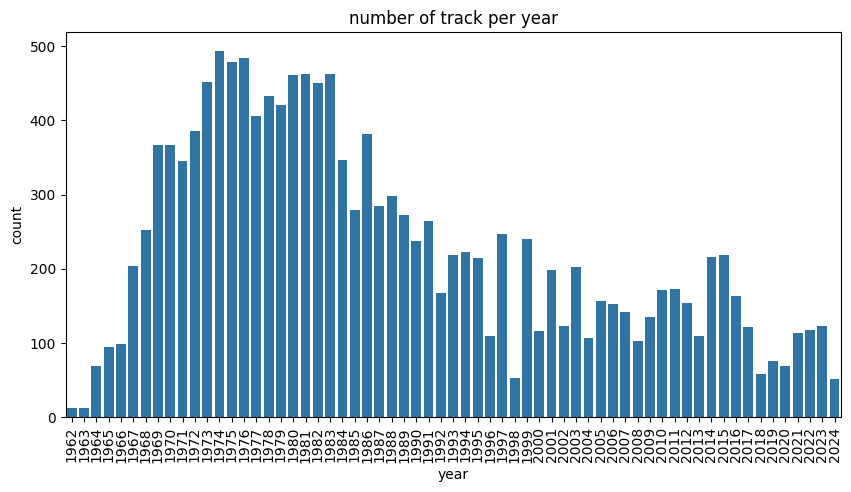

In [ ]:
track_num=df['Year'].value_counts().reset_index()
track_num
plt.figure(figsize=(10,5))
sns.barplot(x='Year',y='count',data=track_num)
plt.title('number of track per year')
plt.xlabel('year')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

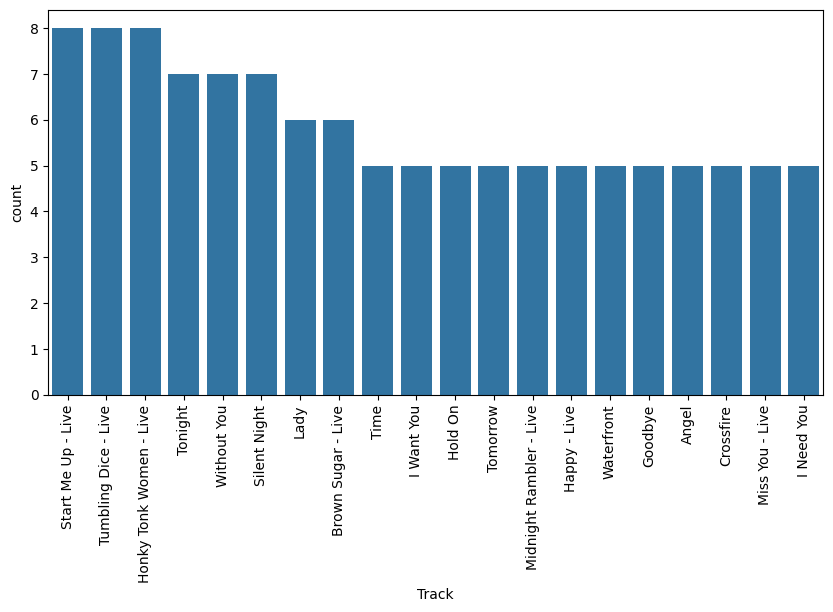

In [ ]:
track_name=df['Track'].value_counts().reset_index().head(20)
track_name
plt.figure(figsize=(10,5))
sns.barplot(x='Track',y='count',data=track_name)
plt.xticks(rotation=90)
plt.show()

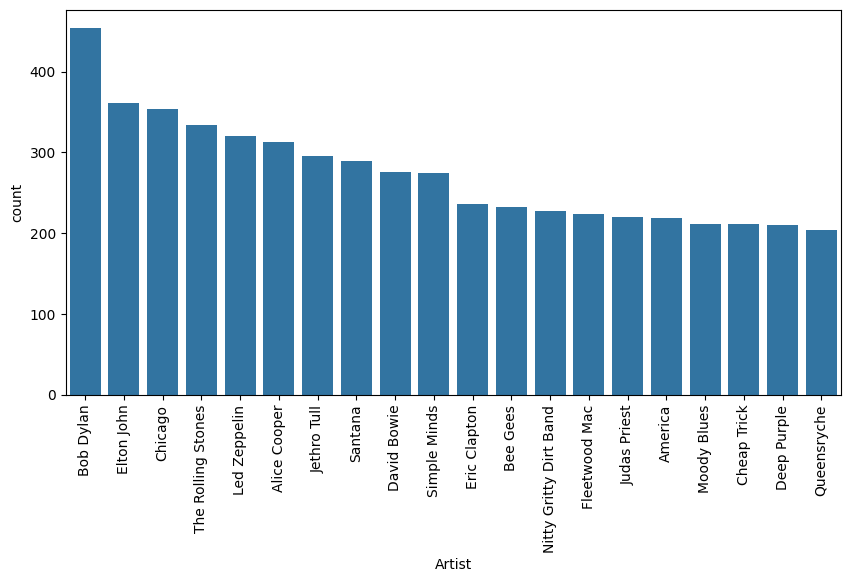

In [ ]:
Artist_name=df['Artist'].value_counts().reset_index().head(20)

plt.figure(figsize=(10,5))
sns.barplot(x='Artist',y='count',data=Artist_name)
plt.xticks(rotation=90)
plt.show()

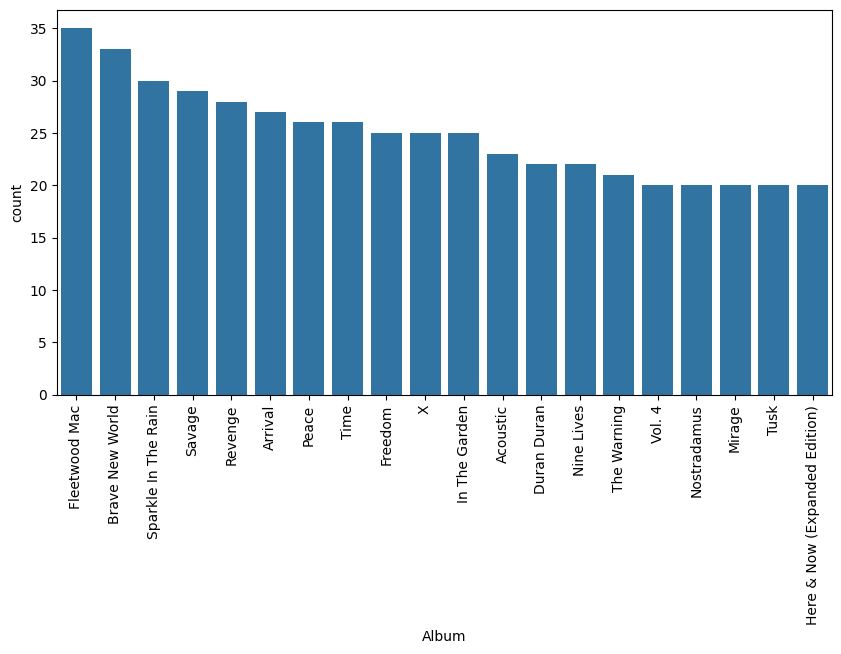

In [ ]:
Album_name=df['Album'].value_counts().reset_index().head(20)

plt.figure(figsize=(10,5))
sns.barplot(x='Album',y='count',data=Album_name)
plt.xticks(rotation=90)
plt.show()

In [ ]:
bob_dylan_df=df[df['Artist']=='Bob Dylan']
bob_dylan_df_album_year=bob_dylan_df[['Year','Album']].drop_duplicates().sort_values(by='Year')
for index, row in bob_dylan_df_album_year.iterrows():
  print(f"{row['Album']} ({row['Year']})")

Bob Dylan (1962)
The Freewheelin' Bob Dylan (1963)
Another Side Of Bob Dylan (1964)
The Times They Are A-Changin' (1964)
Bringing It All Back Home (1965)
Highway 61 Revisited (1965)
Blonde On Blonde (1966)
John Wesley Harding (1967)
Nashville Skyline (1969)
Self Portrait (1970)
New Morning (1970)
Dylan (1973) (1973)
Pat Garrett & Billy The Kid (Soundtrack From The Motion Picture) (1973)
Planet Waves (1974)
Blood On The Tracks (1975)
The Basement Tapes (1975)
Desire (1976)
Street-Legal (1978)
Slow Train Coming (1979)
Saved (1980)
Shot Of Love (1981)
Infidels (1983)
Empire Burlesque (1985)
Knocked Out Loaded (1986)
Down In The Groove (1988)
Oh Mercy (1989)
Under The Red Sky (1990)
Good As I Been To You (1992)
World Gone Wrong (1993)
Time Out Of Mind (1997)
Love And Theft (2001)
Modern Times (2006)
Christmas In The Heart (2009)
Together Through Life (2009)
Tempest (2012)
Shadows in the Night (2015)
Fallen Angels (2016)
Triplicate (2017)
Rough and Rowdy Ways (2020)
Shadow Kingdom (2023)


In [ ]:
def convert_to_seconds(duration):
    try:
        minutes, seconds = map(int, duration.split(':'))
        return minutes * 60 + seconds
    except:
        return None
df['Duration_seconds']=df['Duration'].apply(convert_to_seconds)
top_20_longest=df[['Track', 'Duration_seconds']].sort_values(by='Duration_seconds',ascending=False).head(20)
top_20_longest


,Track,Duration_seconds
876,Statesboro Blues - Live at the Atlanta Interna...,2018
9943,Seven Psalms: The Lord / Love Is Like a Braid ...,1982
8151,Dazed and Confused - (Live at MSG 1973) [Remas...,1758
971,"Desdemona (Live at Murat Centre, Indianapolis,...",1647
8210,Dazed and Confused - Live 1972; Remaster,1525
7392,Amsterdam,1499
10121,Atom Heart Mother,1421
10125,Echoes,1412
7061,A Passion Play (Pt. II) - Pt. II; 2003 Remaster,1410
870,Rain Delay - Live at the Atlanta International...,1389


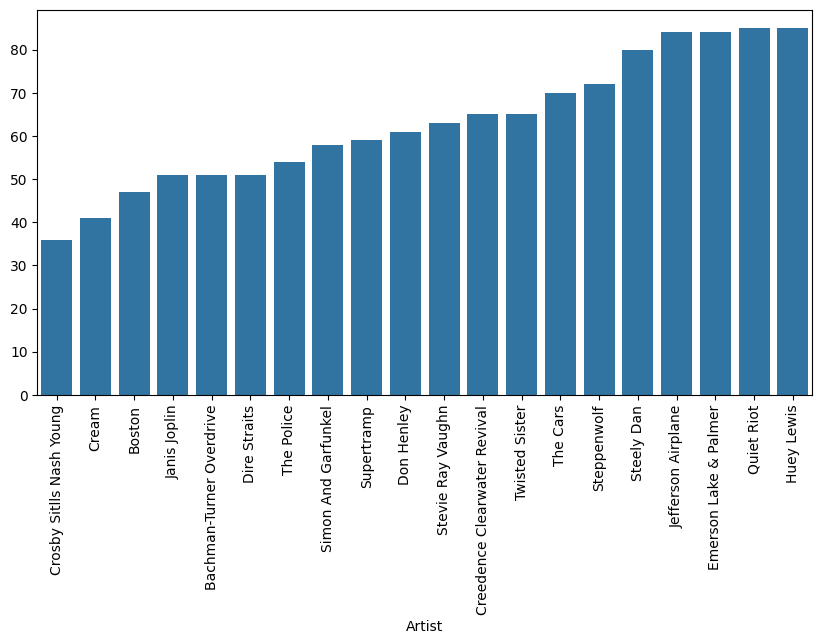

In [ ]:
bottom_20_artist=df['Artist'].value_counts().sort_values(ascending=True).head(20)
bottom_20_artist
plt.figure(figsize=(10,5))
sns.barplot(x=bottom_20_artist.index,y=bottom_20_artist.values)
plt.xticks(rotation=90)
plt.show()

In [ ]:
olli=df[['Album','Mode']].value_counts().reset_index().head(20)
olli

,Album,Mode,count
0,Fleetwood Mac,1,26
1,Peace,1,24
2,Revenge,1,24
3,Sparkle In The Rain,1,23
4,Arrival,1,23
5,Savage,1,21
6,Self Portrait,1,20
7,Stars And Stripes Forever,1,19
8,Triplicate,1,19
9,Pearl (Legacy Edition),1,18


In [ ]:
olli_1=df[['Popularity','Mode','Album']].value_counts().reset_index().head(20).drop_duplicates()
olli_1

,Popularity,Mode,Album,count
0,0,1,A Little River Band Christmas,12
1,1,1,O Christmas Three (2023 Remaster),10
2,2,1,Test of Time,8
3,10,1,Tarkus (Deluxe),7
4,2,1,A Wild-Eyed Christmas Night,7
5,6,1,Restless Heart (25th Anniversary Edition),6
6,5,1,Flash Gordon (Original Soundtrack),6
7,0,1,Zig Zag Walk,6
8,4,1,Savage,6
9,3,1,Stars And Stripes Forever,6


In [ ]:
p=df[['Mode','Popularity',]].value_counts().reset_index().head(20)
p

,Mode,Popularity,count
0,1,17,300
1,1,26,293
2,1,21,287
3,1,14,285
4,1,16,283
5,1,15,283
6,1,20,281
7,1,19,281
8,1,23,279
9,1,22,274


In [ ]:
df['Popularity'].values

array([16, 10, 13, ...,  8,  9,  8])